In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
file_path = 'data/netflix_titles_Modified.csv'
file_path2 = 'data/hulu_titles_modified.csv'
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/shruti/MSDS593/EDA-project/msds593_group32


In [4]:
try:
    dfNetflix = pd.read_csv(file_path, encoding='ISO-8859-1')
    dfHulu = pd.read_csv(file_path2, encoding='ISO-8859-1')
    print("CSV file loaded successfully.")
except UnicodeDecodeError as e:
    print("UnicodeDecodeError:", e)
    dfNetflix = pd.read_csv(file_path, encoding='utf-8', errors='replace')
    dfHulu = pd.read_csv(file_path2, encoding='ISO-8859-1')
    print("CSV file loaded with 'replace' option for errors.")

CSV file loaded successfully.


In [5]:
dfNetflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8803 non-null   object 
 9   duration      8804 non-null   object 
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
 12  Index         8807 non-null   int64  
 13  IMDB_Rating   8425 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 963.4+ KB


In [6]:
dfNetflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Index,IMDB_Rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0,7.4
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,6.7
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2,7.2
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",3,6.5
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,4,9.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,5,7.7
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,6,6.8
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",7,7.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,8,8.1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,6.4


In [7]:
# Filter rows where 'date_added' is not NaN
dfNetflixClean = dfNetflix[dfNetflix['date_added'].notna()].copy()
dfNetflixClean = dfNetflixClean[dfNetflixClean['IMDB_Rating'].notna()].copy()
dfNetflixClean.info()
dfNetflixClean.shape

<class 'pandas.core.frame.DataFrame'>
Index: 8415 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8415 non-null   object 
 1   type          8415 non-null   object 
 2   title         8415 non-null   object 
 3   director      5926 non-null   object 
 4   cast          7649 non-null   object 
 5   country       7735 non-null   object 
 6   date_added    8415 non-null   object 
 7   release_year  8415 non-null   int64  
 8   rating        8411 non-null   object 
 9   duration      8412 non-null   object 
 10  listed_in     8415 non-null   object 
 11  description   8415 non-null   object 
 12  Index         8415 non-null   int64  
 13  IMDB_Rating   8415 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 986.1+ KB


(8415, 14)

In [8]:
dfNetflixClean['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [9]:
dfNetflixClean['release_year'].value_counts()

release_year
2018    1094
2017     979
2019     968
2020     912
2016     856
        ... 
1942       2
1964       2
1966       1
1961       1
1947       1
Name: count, Length: 72, dtype: int64

In [10]:
dfNetflixClean['date_added'] = pd.to_datetime(dfNetflixClean['date_added'], errors='coerce') 
dfNetflixClean['release_year'] = pd.to_datetime(dfNetflixClean['release_year'], errors='coerce', format='%Y') 

In [11]:
# Extract the year from 'date_added' and 'release_year' columns
dfNetflixClean['year_added'] = dfNetflixClean['date_added'].dt.year
dfNetflixClean['release_year'] = dfNetflixClean['release_year'].dt.year

In [12]:
dfNetflixClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8415 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8415 non-null   object        
 1   type          8415 non-null   object        
 2   title         8415 non-null   object        
 3   director      5926 non-null   object        
 4   cast          7649 non-null   object        
 5   country       7735 non-null   object        
 6   date_added    8329 non-null   datetime64[ns]
 7   release_year  8415 non-null   int32         
 8   rating        8411 non-null   object        
 9   duration      8412 non-null   object        
 10  listed_in     8415 non-null   object        
 11  description   8415 non-null   object        
 12  Index         8415 non-null   int64         
 13  IMDB_Rating   8415 non-null   float64       
 14  year_added    8329 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1),

In [13]:
sorted([i for i in dfNetflixClean['release_year'].unique() if i > 2000])

[np.int32(2001),
 np.int32(2002),
 np.int32(2003),
 np.int32(2004),
 np.int32(2005),
 np.int32(2006),
 np.int32(2007),
 np.int32(2008),
 np.int32(2009),
 np.int32(2010),
 np.int32(2011),
 np.int32(2012),
 np.int32(2013),
 np.int32(2014),
 np.int32(2015),
 np.int32(2016),
 np.int32(2017),
 np.int32(2018),
 np.int32(2019),
 np.int32(2020),
 np.int32(2021)]

In [14]:
dfNetflixClean['year_added'].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008.,   nan, 2010.])

In [15]:
dfHulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
 12  IMDB_Rating   2799 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 312.2+ KB


In [16]:
# Filter rows where 'date_added' is not NaN
dfHuluClean = dfHulu[dfHulu['date_added'].notna()].copy()
dfHuluClean = dfHuluClean[dfHuluClean['IMDB_Rating'].notna()].copy()
dfHuluClean.info()
dfHuluClean.shape

<class 'pandas.core.frame.DataFrame'>
Index: 2771 entries, 0 to 3044
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       2771 non-null   object 
 1   type          2771 non-null   object 
 2   title         2771 non-null   object 
 3   director      2 non-null      object 
 4   cast          0 non-null      float64
 5   country       1556 non-null   object 
 6   date_added    2771 non-null   object 
 7   release_year  2771 non-null   int64  
 8   rating        2399 non-null   object 
 9   duration      2387 non-null   object 
 10  listed_in     2771 non-null   object 
 11  description   2770 non-null   object 
 12  IMDB_Rating   2771 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 303.1+ KB


(2771, 13)

In [17]:
dfHuluClean['date_added'] = pd.to_datetime(dfHuluClean['date_added'], errors='coerce') 
dfHuluClean['release_year'] = pd.to_datetime(dfHuluClean['release_year'], errors='coerce', format='%Y') 
# Extract the year from 'date_added' and 'release_year' columns
dfHuluClean['year_added'] = dfHuluClean['date_added'].dt.year
dfHuluClean['release_year'] = dfHuluClean['release_year'].dt.year

In [18]:
dfNetflixClean[dfNetflixClean['release_year'] >2014].shape
dfHuluClean[dfHuluClean['release_year'] >2014].shape

(1624, 14)

In [19]:
dfHulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
 12  IMDB_Rating   2799 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 312.2+ KB


In [20]:
sorted([i for i in dfHuluClean['release_year'].unique()])
print(min([i for i in dfHuluClean['date_added'].unique()]))

2006-07-14 00:00:00


In [21]:
dfNetflixClean['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '7 Seasons', '64 min', '59 min', '139 min', '69 min',
    

In [22]:
dfNetflixClean['year_added'].quantile([.0, 0.25, .5, 0.75,  1])

0.00    2008.0
0.25    2018.0
0.50    2019.0
0.75    2020.0
1.00    2021.0
Name: year_added, dtype: float64

In [23]:
dfNetflixClean.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Index,IMDB_Rating,year_added
type,,,,,,,,,,,,,,
Movie,5861,5861,5706,5428,5510,5861,5861,5859,5858,5861,5861,5861,5861,5861
TV Show,2554,2554,220,2221,2225,2468,2554,2552,2554,2554,2554,2554,2554,2468


In [24]:

print(dfNetflixClean[dfNetflixClean['year_added'] >= 2020]['date_added'].count())

3243


In [25]:
dfHuluClean.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_Rating,year_added
type,,,,,,,,,,,,,
Movie,1360,1360,2,0,653,1360,1360,1137,976,1360,1359,1360,1360
TV Show,1411,1411,0,0,903,1411,1411,1262,1411,1411,1411,1411,1411


In [26]:
dfHuluClean['year_added'].quantile([.0, 0.25, .5, 0.75,  1])

0.00    2006.0
0.25    2018.0
0.50    2020.0
0.75    2021.0
1.00    2021.0
Name: year_added, dtype: float64

In [27]:
print(dfHuluClean[dfHuluClean['year_added'] >= 2020]['date_added'].count())

1714


In [28]:
da1 =[dfNetflixClean[dfNetflixClean["IMDB_Rating"]>7]["IMDB_Rating"].count(),
dfNetflixClean[dfNetflixClean["IMDB_Rating"]>8]["IMDB_Rating"].count(),
dfNetflixClean[dfNetflixClean["IMDB_Rating"]>9]["IMDB_Rating"].count(),
dfHuluClean[dfHuluClean["IMDB_Rating"]>7]["IMDB_Rating"].count(),
dfHuluClean[dfHuluClean["IMDB_Rating"]>8]["IMDB_Rating"].count(),
dfHuluClean[dfHuluClean["IMDB_Rating"]>9]["IMDB_Rating"].count(),
]

In [29]:
print(da1)

[np.int64(3080), np.int64(736), np.int64(38), np.int64(1231), np.int64(342), np.int64(9)]


In [30]:
netflixDocChecklist = ["Documentaries","Docuseries"]
huluDocChecklist = ["Cooking & Food","Documentaries","Lifestyle & Culture","History"]

In [31]:
def inCheck(checklist, lst):
    if isinstance(lst, float):
        return False
    if isinstance(lst, type):
        return False
    for i in checklist:
        if i in lst:
            return True
    return False

In [32]:
dfHuluClean[[inCheck( huluDocChecklist, i) for i in dfHuluClean["listed_in"]]]["listed_in"].count()
dfNetflixClean[[inCheck( netflixDocChecklist, i) for i in dfNetflixClean["listed_in"]]]["listed_in"].count()

np.int64(1198)

In [33]:
dfNetflix1500 =  dfNetflixClean.sort_values(by='date_added', ascending=False).head(1500).copy()


In [34]:
# dfNetflix1500.head(15)

In [35]:
dfNetflix1500.tail(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Index,IMDB_Rating,year_added
1528,s1529,TV Show,Run On,NaN,"Yim Si-wan, Shin Sae-kyeong, Choi Soo-young, K...",South Korea,2020-12-17,2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Veering off course from his preset path, a tra...",1528,7.4,2020.0
1523,s1524,Movie,An Unremarkable Christmas,Juan Camilo Pinzon,"Antonio Sanint, Luis Eduardo Arango, MarÃ­a Ce...",Colombia,2020-12-17,2020,TV-14,83 min,"Comedies, Dramas, International Movies",An accountant and aspiring magician invites hi...,1523,3.3,2020.0
1524,s1525,Movie,Braven,Lin Oeding,"Jason Momoa, Garret Dillahunt, Jill Wagner, St...",Canada,2020-12-17,2018,R,94 min,Action & Adventure,A logger defends himself and his family from a...,1524,5.9,2020.0
1526,s1527,Movie,Love You to the Stars and Back,Antoinette Jadaone,"Julia Barretto, Joshua Garcia, Carmina Villaro...",Philippines,2020-12-17,2017,TV-14,111 min,"Comedies, International Movies, Romantic Movies","In search of aliens, a young woman's road trip...",1526,7.4,2020.0
1527,s1528,TV Show,Morphle,NaN,NaN,Netherlands,2020-12-17,2020,TV-Y,2 Seasons,"British TV Shows, Kids' TV",Little Mila turns playtime into a series of fu...,1527,4.2,2020.0
1529,s1530,Movie,Sakaling Maging Tayo,JP Habac,"McCoy De Leon, Elisse Joson, Bembol Roco, Chai...",Philippines,2020-12-17,2019,TV-14,90 min,"International Movies, Romantic Movies",A college student seizes his chance with a cru...,1529,6.7,2020.0
1530,s1531,TV Show,Schulz Saves America,Alexx Media,Andrew Schulz,United States,2020-12-17,2020,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedian Andrew Schulz takes on the year's mos...,1530,7.3,2020.0
1531,s1532,Movie,The Wedding Shaman,Farishad I. Latjuba,"Atiqah Hasiholan, Tutie Kirana, Arifin Putra, ...",NaN,2020-12-17,2019,TV-PG,111 min,"Dramas, International Movies, Romantic Movies","After a betrayal at work, a finance profession...",1531,7.1,2020.0
1536,s1537,Movie,Incarnate,Brad Peyton,"Aaron Eckhart, Carice van Houten, Catalina San...",United States,2020-12-16,2016,PG-13,87 min,"Horror Movies, Thrillers",An unconventional demon hunter faces his great...,1536,5.3,2020.0
1534,s1535,Movie,Bwakaw,Jun Lana,"Eddie Garcia, Princess, Rez Cortez, Bibeth Ort...","Philippines, Canada, United Kingdom, United St...",2020-12-16,2012,TV-MA,110 min,"Dramas, International Movies, LGBTQ Movies","Gruff and alone, retiree Rene rejects most hum...",1534,7.1,2020.0


In [36]:
dfHulu1500 =  dfHuluClean.sort_values(by='date_added', ascending=False).head(1500).copy()

In [37]:
# dfHulu1500.head(15)

In [38]:
dfHulu1500.tail(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_Rating,year_added
1656,s1657,Movie,Top End Wedding,NaN,NaN,Australia,2020-05-22,2019,102 min,NaN,"Comedy, Romance","Lauren and Ned are engaged, they are in love, ...",6.3,2020
1657,s1658,TV Show,K.C. Undercover,NaN,NaN,United States,2020-05-21,2015,TV-Y7,3 Seasons,"Black Stories, Comedy, Family",High school student K.C. Cooper goes undercove...,6.5,2020
1658,s1659,Movie,Red Dog,NaN,NaN,"United States, Costa Rica",2020-05-21,2019,102 min,NaN,Documentaries,Hit songwriter Luke Dick spent his childhood i...,7.3,2020
1664,s1665,Movie,Cosmos,NaN,NaN,United Kingdom,2020-05-20,2019,129 min,NaN,"Action, Adventure, Drama",Three amateur astronomers accidentally interce...,9.2,2020
1669,s1670,Movie,The Mandela Effect,NaN,NaN,United States,2020-05-20,2019,80 min,NaN,"Horror, Science Fiction, Thriller",A man becomes obsessed with facts and events t...,5.8,2020
1666,s1667,TV Show,Morphle,NaN,NaN,NaN,2020-05-20,2019,NaN,1 Season,"Action, Adventure, Family",My Magic Pet Morphle' is an animated hit TV sh...,4.2,2020
1665,s1666,Movie,Da Sweet Blood of Jesus,NaN,NaN,NaN,2020-05-20,2015,NaN,124 min,"Comedy, Horror, Thriller","In this stylized Spike Lee thriller, a man cur...",4.5,2020
1668,s1669,TV Show,Scandal,NaN,NaN,NaN,2020-05-20,2012,TV-14,7 Seasons,"Black Stories, Drama",A former media relations consultant to the Pre...,7.7,2020
1663,s1664,Movie,Big Men,NaN,NaN,"United Kingdom, Denmark, United States",2020-05-20,2013,100 min,NaN,Documentaries,"Executive produced by Brad Pitt, Big Men is a ...",7.2,2020
1660,s1661,Movie,Above the Shadows,NaN,NaN,United States,2020-05-20,2019,111 min,NaN,"Drama, Science Fiction","A supernatural tale starring Olivia Thirlby, A...",6.1,2020


In [39]:
dfHulu1500[[inCheck( huluDocChecklist, i) for i in dfHulu1500["listed_in"]]]["listed_in"].count()
dfNetflix1500[[inCheck( netflixDocChecklist, i) for i in dfNetflix1500["listed_in"]]]["listed_in"].count()

np.int64(163)

In [40]:
dfNetflixA2020 = dfNetflixClean[dfNetflixClean['year_added']>=2020]
dfHuluA2020 = dfHuluClean[dfHuluClean['year_added']>=2020]

In [41]:
print(dfHuluA2020.shape, dfNetflixA2020.shape)

(1714, 14) (3243, 15)


In [42]:
print(dfHuluA2020[[inCheck( huluDocChecklist, i) for i in dfHuluA2020["listed_in"]]]["listed_in"].count(),
dfNetflixA2020[[inCheck( netflixDocChecklist, i) for i in dfNetflixA2020["listed_in"]]]["listed_in"].count())

441 348


In [43]:
print(dfHulu1500[[inCheck( huluDocChecklist, i) for i in dfHulu1500["listed_in"]]]["listed_in"].count(),
dfNetflix1500[[inCheck( netflixDocChecklist, i) for i in dfNetflix1500["listed_in"]]]["listed_in"].count())

384 163


In [44]:
print(dfHuluClean[[inCheck( huluDocChecklist, i) for i in dfHuluClean["listed_in"]]]["listed_in"].count(),
dfNetflixClean[[inCheck( netflixDocChecklist, i) for i in dfNetflixClean["listed_in"]]]["listed_in"].count())

626 1198


In [45]:
dfNetflix1500.groupby("country")['country'].value_counts()

country
, France, Algeria                                  1
, South Korea                                      1
Argentina                                          8
Argentina, Chile                                   1
Argentina, Spain                                   1
                                                  ..
United States, United Kingdom, Germany, Hungary    1
United States, United Kingdom, New Zealand         1
Uruguay                                            1
Uruguay, Germany                                   1
Vietnam                                            2
Name: count, Length: 195, dtype: int64

In [46]:
def notInCheck(checklist, lst):
    # Check if lst is not a float and is a list
    # if not isinstance(lst, list):
    #     return False
    if isinstance(lst, float):
        return False
    
    # Check if any element in checklist is not in lst
    res= True
    for i in checklist:
        if i in lst:
            res = False
        else:
            res = res & True
    
    return res


In [47]:
print(dfHulu1500[[notInCheck( ['United States'], i) for i in dfHulu1500["country"]]]["country"].count(), 
dfNetflix1500[[notInCheck( ['United States'], i) for i in dfNetflix1500["country"]]]["country"].count())

113 536


In [48]:
print(dfHulu1500[[notInCheck( ['United States', 'United Kingdom'], i) for i in dfHulu1500["country"]]]["country"].count(),
dfNetflix1500[[notInCheck( ['United States', 'United Kingdom'], i) for i in dfNetflix1500["country"]]]["country"].count())

65 474


In [49]:
print(dfHuluA2020[[notInCheck( ['United States', 'United Kingdom'], i) for i in dfHuluA2020["country"]]]["country"].count(),
dfNetflixA2020[[notInCheck( ['United States', 'United Kingdom'], i) for i in dfNetflixA2020["country"]]]["country"].count())

112 1268


In [50]:
print(dfHuluA2020[[notInCheck( ['United States'], i) for i in dfHuluA2020["country"]]]["country"].count(),
dfNetflixA2020[[notInCheck( ['United States'], i) for i in dfNetflixA2020["country"]]]["country"].count())

167 1407


In [51]:
dfHuluClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2771 entries, 0 to 3044
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2771 non-null   object        
 1   type          2771 non-null   object        
 2   title         2771 non-null   object        
 3   director      2 non-null      object        
 4   cast          0 non-null      float64       
 5   country       1556 non-null   object        
 6   date_added    2771 non-null   datetime64[ns]
 7   release_year  2771 non-null   int32         
 8   rating        2399 non-null   object        
 9   duration      2387 non-null   object        
 10  listed_in     2771 non-null   object        
 11  description   2770 non-null   object        
 12  IMDB_Rating   2771 non-null   float64       
 13  year_added    2771 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(9)
memory usage: 303.1+ KB


In [52]:
da2 =[dfNetflix1500[dfNetflix1500["IMDB_Rating"]>7]["IMDB_Rating"].count(),
dfNetflix1500[dfNetflix1500["IMDB_Rating"]>8]["IMDB_Rating"].count(),
dfNetflix1500[dfNetflixClean["IMDB_Rating"]>9]["IMDB_Rating"].count(),
dfHulu1500[dfHulu1500["IMDB_Rating"]>7]["IMDB_Rating"].count(),
dfHulu1500[dfHulu1500["IMDB_Rating"]>8]["IMDB_Rating"].count(),
dfHulu1500[dfHulu1500["IMDB_Rating"]>9]["IMDB_Rating"].count(),
]

/var/folders/1g/bksky7bd2wb927qzgc2fqjhc0000gn/T/ipykernel_18858/2071685897.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfNetflix1500[dfNetflixClean["IMDB_Rating"]>9]["IMDB_Rating"].count(),


In [53]:
print(da2)

[np.int64(518), np.int64(129), np.int64(8), np.int64(563), np.int64(147), np.int64(6)]


In [54]:
print(dfHulu1500[[inCheck( huluDocChecklist, i) for i in dfHulu1500["listed_in"]]]["listed_in"].count(),
dfNetflix1500[[inCheck( netflixDocChecklist, i) for i in dfNetflix1500["listed_in"]]]["listed_in"].count())

384 163


In [55]:
dfNetflix1500["rating"].value_counts()

rating
TV-MA    495
TV-14    318
R        195
PG-13    148
TV-PG     99
TV-Y7     77
TV-Y      61
PG        59
TV-G      44
G          4
Name: count, dtype: int64

In [56]:
dfHulu1500["rating"].value_counts()

rating
TV-14        250
R            247
TV-PG        138
PG-13        128
TV-MA        119
            ... 
121 min        1
136 min        1
4 Seasons      1
NOT RATED      1
129 min        1
Name: count, Length: 66, dtype: int64

In [57]:
familyFriendlyChecklist = ['TV-Y', 'TV-Y7', 'TV-G','TV-PG', 'PG', 'PG-PG']

In [58]:
print(dfHulu1500[[inCheck( familyFriendlyChecklist, i) for i in dfHulu1500["rating"]]]["rating"].count(),
dfNetflix1500[[inCheck( familyFriendlyChecklist, i) for i in dfNetflix1500["rating"]]]["rating"].count())

425 488


In [59]:
print(dfHuluA2020[[inCheck( familyFriendlyChecklist, i) for i in dfHuluA2020["rating"]]]["rating"].count(),
dfNetflixA2020[[inCheck( familyFriendlyChecklist, i) for i in dfNetflixA2020["rating"]]]["rating"].count())

465 1010


In [60]:
# dfHulu1500.to_csv('hulu_1500.csv', index=False)
# dfNetflix1500.to_csv('netflix_1500.csv', index=False)

In [61]:
# dfHuluA2020.to_csv('hulu_2020.csv', index=False)
# dfNetflixA2020.to_csv('netflix_2020.csv', index=False)

In [62]:
dfHulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
 12  IMDB_Rating   2799 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 312.2+ KB


In [63]:
sorted([i for i in dfHuluClean['release_year'].unique()])
print(min([i for i in dfHuluClean['date_added'].unique()]))

2006-07-14 00:00:00


In [64]:
dfNetflixClean['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '7 Seasons', '64 min', '59 min', '139 min', '69 min',
    

In [65]:
dfNetflixClean.groupby('type')['release_year'].quantile([.0, 0.25, .5, 0.75,  1])

type         
Movie    0.00    1942.0
         0.25    2012.0
         0.50    2016.0
         0.75    2018.0
         1.00    2021.0
TV Show  0.00    1945.0
         0.25    2016.0
         0.50    2018.0
         0.75    2020.0
         1.00    2021.0
Name: release_year, dtype: float64

In [66]:
dfNetflixClean.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Index,IMDB_Rating,year_added
type,,,,,,,,,,,,,,
Movie,5861,5861,5706,5428,5510,5861,5861,5859,5858,5861,5861,5861,5861,5861
TV Show,2554,2554,220,2221,2225,2468,2554,2552,2554,2554,2554,2554,2554,2468


In [67]:
dfHuluClean.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_Rating,year_added
type,,,,,,,,,,,,,
Movie,1360,1360,2,0,653,1360,1360,1137,976,1360,1359,1360,1360
TV Show,1411,1411,0,0,903,1411,1411,1262,1411,1411,1411,1411,1411


In [68]:
dfHuluClean.groupby('type')['release_year'].quantile([.0, 0.25, .5, 0.75,  1])

type         
Movie    0.00    1923.0
         0.25    2012.0
         0.50    2017.0
         0.75    2019.0
         1.00    2021.0
TV Show  0.00    1933.0
         0.25    2009.0
         0.50    2015.0
         0.75    2019.0
         1.00    2021.0
Name: release_year, dtype: float64

In [68]:
dfHulu1500["country"].value_counts

<bound method IndexOpsMixin.value_counts of 0                                                     NaN
2                                                     NaN
1                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
1662                                        United States
1659                                                  NaN
1667    United States, Australia, Colombia, French Pol...
1661                             United States, Hong Kong
1678                                                  NaN
Name: country, Length: 1500, dtype: object>

In [69]:
dfHulu1500["country"].__contains__("United States")

False

#### EDA - NETFLIX AND HULU

Performing EDA after Peeyush merged IMDb data and cleaned the dataset to two major subsets - DfClean and Df1500 for both Netflix and Hulu

In [70]:
dfNetflixClean.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Index,IMDB_Rating,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0,7.4,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,6.7,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2,7.2,2021.0


In [71]:
dfNetflixClean.shape #8415 rows, 15 columns 

(8415, 15)

In [72]:
dfNetflixClean.info() #director and cast not relevant 
#680 null values ---country
#86 null values ---date_added, year_added

<class 'pandas.core.frame.DataFrame'>
Index: 8415 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8415 non-null   object        
 1   type          8415 non-null   object        
 2   title         8415 non-null   object        
 3   director      5926 non-null   object        
 4   cast          7649 non-null   object        
 5   country       7735 non-null   object        
 6   date_added    8329 non-null   datetime64[ns]
 7   release_year  8415 non-null   int32         
 8   rating        8411 non-null   object        
 9   duration      8412 non-null   object        
 10  listed_in     8415 non-null   object        
 11  description   8415 non-null   object        
 12  Index         8415 non-null   int64         
 13  IMDB_Rating   8415 non-null   float64       
 14  year_added    8329 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1),

In [73]:
#correcting data types
dfNetflixClean["year_added"] = pd.to_datetime(dfNetflixClean["year_added"])
dfNetflixClean["rating"] = dfNetflixClean["rating"].astype("category")
dfNetflixClean["type"] = dfNetflixClean["type"].astype("category")

In [74]:
dfNetflixClean["year_added"] = dfNetflixClean["year_added"].dt.year

In [75]:
dfHuluClean.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_Rating,year_added
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,2021-10-24,2021,TV-MA,NaN,"Comedy, Stand Up",âComedian Ricky Velez bares it all with his ...,6.5,2021
1,s2,Movie,Silent Night,NaN,NaN,NaN,2021-10-23,2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r...",5.3,2021
2,s3,Movie,The Marksman,NaN,NaN,NaN,2021-10-23,2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...,5.7,2021


In [76]:
dfHuluClean.shape #three times SMALLER than Netflix dataset

(2771, 14)

In [77]:
dfHuluClean.info() 
#cast and director have barely any non-null values - we will not be using these columns for analysis
#1215 null values --- country
#372 null values --- rating
#384 null values --- duration
#1 null value --- description

<class 'pandas.core.frame.DataFrame'>
Index: 2771 entries, 0 to 3044
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2771 non-null   object        
 1   type          2771 non-null   object        
 2   title         2771 non-null   object        
 3   director      2 non-null      object        
 4   cast          0 non-null      float64       
 5   country       1556 non-null   object        
 6   date_added    2771 non-null   datetime64[ns]
 7   release_year  2771 non-null   int32         
 8   rating        2399 non-null   object        
 9   duration      2387 non-null   object        
 10  listed_in     2771 non-null   object        
 11  description   2770 non-null   object        
 12  IMDB_Rating   2771 non-null   float64       
 13  year_added    2771 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(9)
memory usage: 303.1+ KB


In [78]:
#correcting data types 
dfHuluClean["type"] = dfHuluClean["type"].astype("category")
dfHuluClean["rating"] = dfHuluClean["rating"].astype("category")
dfHuluClean["year_added"] = pd.to_datetime(dfHuluClean["year_added"])

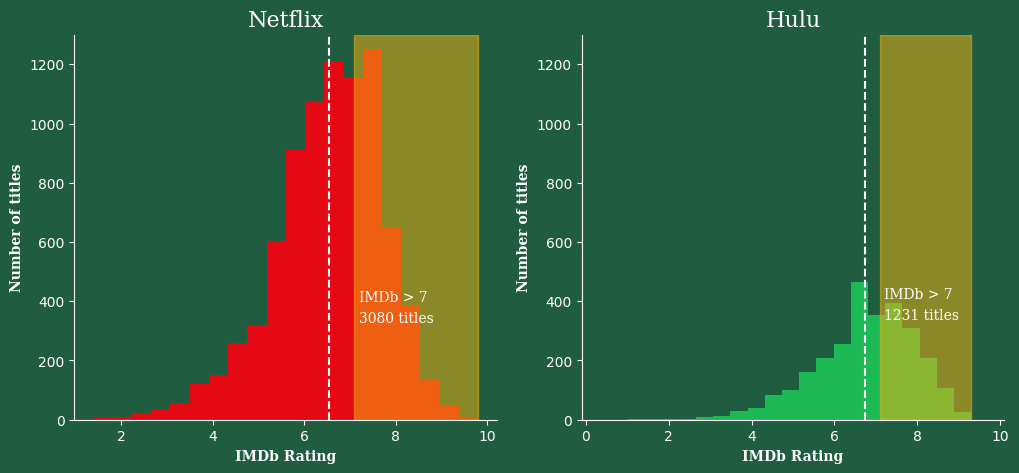

In [79]:
#using variables with NO NULL VALUES --- titles and IMDb 
fig, ax = plt.subplots(nrows = 1,ncols=2,figsize = (12,5))
ax[0].hist(dfNetflixClean["IMDB_Rating"], bins = 20, color = "#e50914")
ax[1].hist(dfHuluClean["IMDB_Rating"], bins = 20, color = "#1DB954")

ax[0].vlines(dfNetflixClean["IMDB_Rating"].mean(),0,1300, colors="white", linestyles="dashed")
ax[1].vlines(dfHuluClean["IMDB_Rating"].mean(),0,1300, colors="white", linestyles="dashed")


#HIGHLIGHT - NETFLIX and HULU
highlight_min1 = dfNetflixClean[dfNetflixClean["IMDB_Rating"] > 7]["IMDB_Rating"].min()
highlight_max1 = dfNetflixClean[dfNetflixClean["IMDB_Rating"] > 7]["IMDB_Rating"].max()
ax[0].axvspan(highlight_min1, highlight_max1, color="#f7b512", alpha=0.5)

highlight_min2 = dfHuluClean[dfHuluClean["IMDB_Rating"] > 7]["IMDB_Rating"].min()
highlight_max2 = dfHuluClean[dfHuluClean["IMDB_Rating"] > 7]["IMDB_Rating"].max()
ax[1].axvspan(highlight_min2, highlight_max2, color="#f7b512", alpha=0.5)

#IMDb counts 
n_imdb = len(dfNetflixClean[dfNetflixClean["IMDB_Rating"]>7])
h_imdb = len(dfHuluClean[dfHuluClean["IMDB_Rating"]>7])

#FLUFF
ax[0].set_title("Netflix", color = "white", weight = "bold", font = "serif", size = 16)
ax[0].set_xlabel("IMDb Rating",color = "white", weight = "bold",font = "serif")
ax[0].set_ylabel("Number of titles",color = "white", weight = "bold", font = "serif")
ax[0].tick_params(axis='x', colors='white')  # Set color for x-tick labels
ax[0].tick_params(axis='y', colors='white')
ax[0].set_ylim(0,1300)

ax[0].annotate("IMDb > 7",(7.2,400), color = "white",font = "serif")
ax[0].annotate(f"{n_imdb} titles" ,(7.2,330), color = "white",font = "serif")


ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["bottom"].set_color("white")
ax[0].spines["left"].set_color("white")

ax[1].set_title("Hulu", color = "white", weight = "bold",font = "serif",size = 16)
ax[1].set_xlabel("IMDb Rating",color = "white", weight = "bold",font = "serif")
ax[1].set_ylabel("Number of titles",color = "white", weight = "bold",font = "serif")
ax[1].tick_params(axis='x', colors='white')  # Set color for x-tick labels
ax[1].tick_params(axis='y', colors='white')
ax[1].set_xlim(0-.1,10+.1)
ax[1].set_ylim(0,1300)

ax[1].annotate("IMDb > 7",(7.2,410), color = "white", font = "serif")
ax[1].annotate(f"{h_imdb} titles",(7.2,340), color = "white", font = "serif")

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["bottom"].set_color("white")
ax[1].spines["left"].set_color("white")



ax[0].set_facecolor("#205c40")
fig.patch.set_facecolor("#205c40")

ax[1].set_facecolor("#205c40")
fig.patch.set_facecolor("#205c40")

In [80]:
print(f"netflix = {dfNetflix1500.shape}, hulu = {dfHulu1500.shape}")

netflix = (1500, 15), hulu = (1500, 14)


In [81]:
dfNetflix1500.info()
#not considering director or cast 
#316 null values --- country

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1540
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1500 non-null   object        
 1   type          1500 non-null   object        
 2   title         1500 non-null   object        
 3   director      1027 non-null   object        
 4   cast          1359 non-null   object        
 5   country       1184 non-null   object        
 6   date_added    1500 non-null   datetime64[ns]
 7   release_year  1500 non-null   int32         
 8   rating        1500 non-null   object        
 9   duration      1500 non-null   object        
 10  listed_in     1500 non-null   object        
 11  description   1500 non-null   object        
 12  Index         1500 non-null   int64         
 13  IMDB_Rating   1500 non-null   float64       
 14  year_added    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1),

In [82]:
#correcting data types
dfNetflix1500["year_added"] = pd.to_datetime(dfNetflix1500["year_added"])
dfNetflix1500["rating"] = dfNetflix1500["rating"].astype("category")
dfNetflix1500["type"] = dfNetflix1500["type"].astype("category")

In [83]:
dfHulu1500.info()
#not considering director or cast 
#913 null values --- country
#308 null values --- rating 
#212 null values --- duration 
#1 null value --- description 

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1678
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1500 non-null   object        
 1   type          1500 non-null   object        
 2   title         1500 non-null   object        
 3   director      0 non-null      object        
 4   cast          0 non-null      float64       
 5   country       587 non-null    object        
 6   date_added    1500 non-null   datetime64[ns]
 7   release_year  1500 non-null   int32         
 8   rating        1192 non-null   object        
 9   duration      1288 non-null   object        
 10  listed_in     1500 non-null   object        
 11  description   1499 non-null   object        
 12  IMDB_Rating   1500 non-null   float64       
 13  year_added    1500 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(9)
memory usage: 164.1+ KB


In [84]:
#correcting data types
dfHulu1500["year_added"] = pd.to_datetime(dfHulu1500["year_added"])
dfHulu1500["rating"] = dfHulu1500["rating"].astype("category")
dfHulu1500["type"] = dfHulu1500["type"].astype("category")

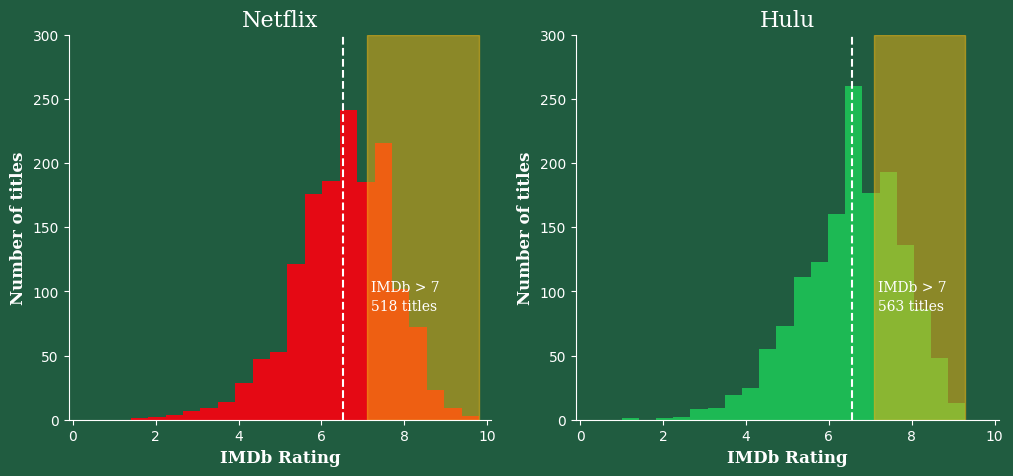

In [182]:
#using variables with NO NULL VALUES --- titles and IMDb 
# col = np.where((dfNetflix1500["IMDB_Rating"]>=7) , '#e50914','#f7b512') doesn't work 
fig, ax = plt.subplots(nrows = 1,ncols=2,figsize = (12,5))
ax[0].hist(dfNetflix1500["IMDB_Rating"], bins = 20, color = "#e50914")
ax[1].hist(dfHulu1500["IMDB_Rating"], bins = 20, color = "#1DB954")


ax[0].vlines(dfNetflix1500["IMDB_Rating"].mean(),0,1300, colors="white", linestyles="dashed")
ax[1].vlines(dfHulu1500["IMDB_Rating"].mean(),0,500, colors="white", linestyles="dashed")


#HIGHLIGHT - NETFLIX and HULU
highlight_min1 = dfNetflix1500[dfNetflix1500["IMDB_Rating"] > 7]["IMDB_Rating"].min()
highlight_max1 = dfNetflix1500[dfNetflix1500["IMDB_Rating"] > 7]["IMDB_Rating"].max()
ax[0].axvspan(highlight_min1, highlight_max1, color="#f7b512", alpha=0.5)

highlight_min2 = dfHulu1500[dfHulu1500["IMDB_Rating"] > 7]["IMDB_Rating"].min()
highlight_max2 = dfHulu1500[dfHulu1500["IMDB_Rating"] > 7]["IMDB_Rating"].max()
ax[1].axvspan(highlight_min2, highlight_max2, color="#f7b512", alpha=0.5)

#IMDb counts 
n_imdb = len(dfNetflix1500[dfNetflix1500["IMDB_Rating"]>7])
h_imdb = len(dfHulu1500[dfHulu1500["IMDB_Rating"]>7])

#FLUFF
ax[0].set_title("Netflix", color = "white", weight = "bold", font = "serif", size = 16)
ax[0].set_xlabel("IMDb Rating",color = "white", weight = "bold",font = "serif", size = 12)
ax[0].set_ylabel("Number of titles",color = "white", weight = "bold",font = "serif", size = 12)
ax[0].tick_params(axis='x', colors='white')  # Set color for x-tick labels
ax[0].tick_params(axis='y', colors='white')
ax[0].set_xlim(0-.1,10+.1)
ax[0].set_ylim(0,300)

ax[0].annotate("IMDb > 7",(7.2,100), color = "white",font = "serif")
ax[0].annotate(f"{n_imdb} titles" ,(7.2,85), color = "white",font = "serif")


ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["bottom"].set_color("white")
ax[0].spines["left"].set_color("white")

ax[1].set_title("Hulu", color = "white", weight = "bold",font = "serif", size = 16)
ax[1].set_xlabel("IMDb Rating",color = "white", weight = "bold",font = "serif", size = 12)
ax[1].set_ylabel("Number of titles",color = "white", weight = "bold",font = "serif", size = 12)
ax[1].tick_params(axis='x', colors='white')  # Set color for x-tick labels
ax[1].tick_params(axis='y', colors='white')
ax[1].set_xlim(0-.1,10+.1)
ax[1].set_ylim(0,300)

ax[1].annotate("IMDb > 7",(7.2,100), color = "white", font = "serif")
ax[1].annotate(f"{h_imdb} titles",(7.2,85), color = "white", font = "serif")

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["bottom"].set_color("white")
ax[1].spines["left"].set_color("white")



ax[0].set_facecolor("#205c40")
fig.patch.set_facecolor("#205c40")

ax[1].set_facecolor("#205c40")
fig.patch.set_facecolor("#205c40")

Tackling Null Values

In [86]:
#From earlier:

#dfNetflix1500.info()
#not considering director or cast 
#316 null values --- country

#dfHulu1500.info()
#not considering director or cast 
#913 null values --- country
#308 null values --- rating 
#212 null values --- duration 
#1 null value --- description 

In [87]:
dfNetflix1500["country"].unique()

array(['United States', nan, 'United Kingdom',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'South Africa', 'India', 'Germany, Czech Republic', 'Turkey',
       'Mexico', 'Australia', 'United States, India, France',
       'South Africa, United States, Japan', 'Finland',
       'China, Canada, United States', 'Japan', 'Nigeria',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore',
       'United Kingdom, Australia, France, United States',
       'United Kingdom, Australia, France', 'United States, Canada',
       'Italy, United States', 'United States, China, Hong Kong',
       'Canada', 'United States, Germany', 'Russia',
       'Germany, United States', 'South Africa, United States',
       'United States, Mexico', 'United States, Italy, France, Japan',
       'United States, Italy,

In [88]:
dfHulu1500[dfHulu1500["description"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_Rating,year_added
1158,s1159,Movie,UFC 252,NaN,NaN,NaN,2020-11-25,2020,TV-14,NaN,Sports,NaN,7.1,1970-01-01 00:00:00.000002020


In [89]:
dfHulu1500[["rating","duration"]] #odd --- rating contains duration 

,rating,duration
0,TV-MA,NaN
2,PG-13,108 min
1,NaN,94 min
3,R,97 min
4,NaN,104 min
...,...,...
1662,80 min,NaN
1659,NaN,81 min
1667,NaN,75 min
1661,78 min,NaN


In [93]:
condition = dfHulu1500['rating'].str.contains('min', na=False)
dfHulu1500.loc[condition, 'duration'] = dfHulu1500.loc[condition, 'rating']

In [95]:
dfHulu1500.loc[condition, 'rating'] = np.nan

In [96]:
dfHulu1500[["rating","duration"]] #updated

,rating,duration
0,TV-MA,NaN
2,PG-13,108 min
1,NaN,94 min
3,R,97 min
4,NaN,104 min
...,...,...
1662,NaN,80 min
1659,NaN,81 min
1667,NaN,75 min
1661,NaN,78 min


In [107]:
dfHulu1500["rating"].unique() #rating still contains Seasons which should be in duration

['TV-MA', 'PG-13', NaN, 'R', 'TV-14', ..., 'TV-Y7', 'TV-Y', '3 Seasons', '1 Season', '6 Seasons']
Length: 17
Categories (66, object): ['1 Season', '100 min', '101 min', '102 min', ..., 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7']

In [112]:
condition2 = dfHulu1500["rating"].str.contains("Season", na= False) | dfHulu1500["rating"].str.contains("Season", na = False)
dfHulu1500.loc[condition2,"duration"] = dfHulu1500.loc[condition2,"rating"]

In [116]:
dfHulu1500.loc[condition2,"rating"] = np.nan

In [117]:
dfHulu1500["rating"].isnull().sum() #143 more null values

np.int64(451)

In [118]:
dfHulu1500["duration"].isnull().sum() #143 less null values

np.int64(69)

In [123]:
pd.Series(dfHulu1500["rating"].unique()).to_clipboard()
#unique values: [TV-MA,PG-13,R,TV-14,PG,TV-PG,NOT RATED,G,TV-G,TV-Y7,TV-Y]

In [124]:
dfNetflix1500["rating"].unique()

['PG-13', 'PG', 'TV-MA', 'TV-14', 'TV-PG', 'TV-Y', 'R', 'TV-Y7', 'TV-G', 'G']
Categories (10, object): ['G', 'PG', 'PG-13', 'R', ..., 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7']

In [147]:
family_friendly = ['G', 'PG', 'TV-Y', 'TV-G', 'TV-Y7']
teens = ['PG-13', 'TV-14','TV-PG']
adults = ['R', 'NC-17', 'TV-MA']

def classify_age_group(rating):
    if inCheck(family_friendly, rating):
        return 'Kids'
    elif inCheck(teens, rating):
        return 'Teens'
    elif inCheck(adults, rating):
        return 'Adults'
    else:
        return 'Adults'


dfHulu1500['Age_group'] = dfHulu1500['rating'].apply(classify_age_group)
dfNetflix1500['Age_group'] = dfNetflix1500['rating'].apply(classify_age_group)

In [163]:
dfHulu1500["Age_group"].describe()

count     1049
unique       3
top       Kids
freq       432
Name: Age_group, dtype: object

In [162]:
dfNetflix1500['Age_group'].describe()

count       1500
unique         3
top       Adults
freq         690
Name: Age_group, dtype: object

In [151]:
432/1049

0.41182078169685415

In [173]:
hulu_age.reindex(['Adults', 'Kids', 'Teens'])

Age_group
Adults    367
Kids      432
Teens     250
Name: count, dtype: int64

In [170]:
netflix_age

Age_group
Adults    690
Kids      492
Teens     318
Name: count, dtype: int64

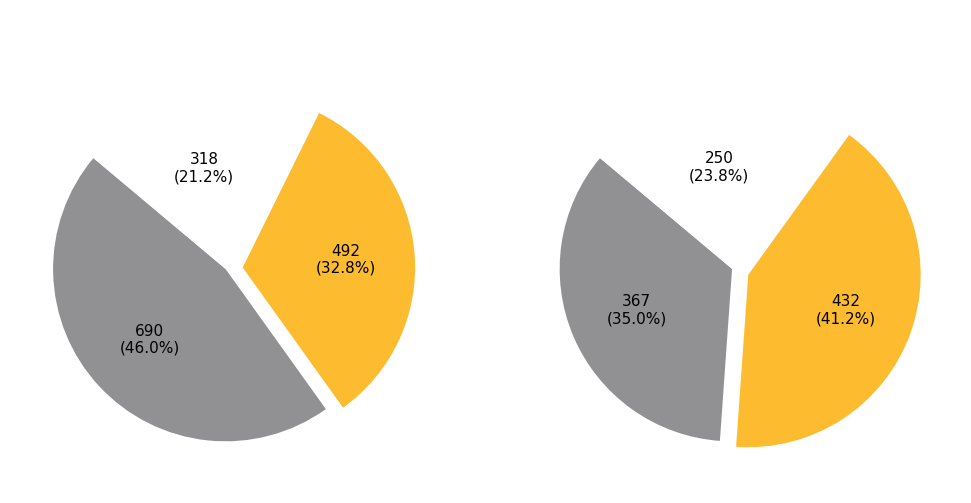

In [187]:
pie_colors = ['#919194', '#FDBB30', '#FFFFFF']
explode = [0, 0.1, 0]
hulu_age = dfHulu1500["Age_group"].value_counts().reindex(['Adults', 'Kids', 'Teens'])
netflix_age = dfNetflix1500['Age_group'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

hulu_pie, hulu_texts, hulu_autotexts = axes[1].pie(hulu_age, labels=hulu_age.index, explode=explode, autopct='%1.1f%%', startangle=140, colors=pie_colors,textprops={'color':'white','fontsize': 12}
)

axes[1].set_title('Hulu', y=-0.03, color="white", font='Serif', size=14,weight = "bold")
                  
#path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

for text in hulu_autotexts:
    text.set_color('black')
    text.set_size(12)
#     text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

for i, txt in enumerate(hulu_autotexts):
    txt.set_text(f"{hulu_age.iloc[i]}\n({txt.get_text()})") #txt.set_text is new text, txt.get_text is current text
    txt.set_size(11) 

netflix_pie, netflix_texts, netflix_autotexts = axes[0].pie(
    netflix_age, labels=netflix_age.index, explode=explode, autopct='%1.1f%%', startangle=140, colors=pie_colors,textprops={'color':'white','fontsize': 12}
)
axes[0].set_title('Netflix', y=-0.03, color="white", font='Serif', size=14, weight = "bold")
#path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

for text in netflix_autotexts:
    text.set_color('black')
    text.set_size(12)
#     text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

for i, txt in enumerate(netflix_autotexts):
    txt.set_text(f"{netflix_age.iloc[i]}\n({txt.get_text()})")
    txt.set_size(11) 

fig.suptitle('Age Group Distribution based on Ratings', color="white", font='Serif', size=18, weight = "bold") 
#path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])
fig.patch.set_facecolor('None')

plt.tight_layout()
plt.show()

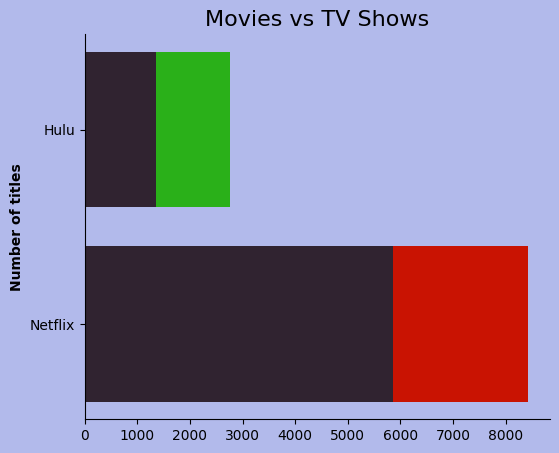

In [92]:
n_type = dfNetflixClean["type"].value_counts()
h_type = dfHuluClean["type"].value_counts()

fig, ax = plt.subplots(figsize = (6,5))
x = ["Netflix","Hulu"]
ylow = [n_type["Movie"],h_type["Movie"]]
yhigh = [n_type["TV Show"],h_type["TV Show"]]
ax.barh(x,ylow,color='#302330',label = "movies")
ax.barh(x,yhigh,left = ylow,color = ["#c91302","#2ab019"] , label = ["TV shows","TV shows"])

ax.set_title("Movies vs TV Shows", size=16)
ax.set_ylabel("Number of titles",weight = "bold")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_facecolor("#b2baeb")
fig.patch.set_facecolor("#b2baeb")

#fig.legend()


In [70]:
dfHulu1500['country'].value_counts()

country
United States                                     383
United Kingdom                                     41
Japan                                              17
Canada                                             16
Australia                                           9
                                                 ... 
United Kingdom, United Arab Emirates                1
Germany, Norway                                     1
Sweden, United States, Germany, United Kingdom      1
United States, United Kingdom, Italy                1
United States, Hong Kong                            1
Name: count, Length: 85, dtype: int64

In [70]:
dfHulu1500['country'].value_counts()

country
United States                                     383
United Kingdom                                     41
Japan                                              17
Canada                                             16
Australia                                           9
                                                 ... 
United Kingdom, United Arab Emirates                1
Germany, Norway                                     1
Sweden, United States, Germany, United Kingdom      1
United States, United Kingdom, Italy                1
United States, Hong Kong                            1
Name: count, Length: 85, dtype: int64